In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-02-14 05:07:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 142.251.188.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  64.0MB/s    in 5.1s    

2025-02-14 05:07:18 (98.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

zipped = zipfile.ZipFile("10_food_classes_all_data.zip")
zipped.extractall()
zipped.close()

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.

In [ ]:
import tf_keras as tfk
from tensorflow.keras.applications import EfficientNetB2

base_model = EfficientNetB2(include_top=True)
base_model.trainable = False

In [ ]:
base_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_data_without_augmentation = ImageDataGenerator(
    rescale=1./255
)

test_data_without_augmentation = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data = train_data_without_augmentation.flow_from_directory(
    train_dir,
    target_size = IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32,
)


test_data = test_data_without_augmentation.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=32,
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
train_data.image_shape

(224, 224, 3)

In [ ]:
classes = list(train_data.class_indices.keys())

In [ ]:
import random
import matplotlib.image as mpimg
def random_image():
  target_class = random.choice(classes)
  target_dir = train_dir + target_class
  random_image = random.choice(os.listdir(target_dir))
  random_image_path = target_dir + "/" + random_image
  img  = mpimg.imread(random_image_path)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()
  return img

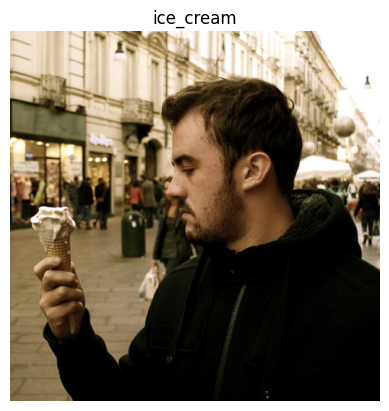

In [ ]:
random_image()

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after base_model: {x.shape}")

x = tf.keras.layers.Dense(100,name="hiddenlayer1")(x)
x = tf.keras.layers.MaxPool2D(name="maxpool_2D")(x)
x = tf.keras.layers.Flatten(name="flatten")(x)
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=test_data,
                                 validation_steps=len(test_data),
)

Shape after base_model: (None, 7, 7, 1280)
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 202ms/step - accuracy: 0.1130 - loss: 2.4049 - val_accuracy: 0.1000 - val_loss: 2.3076
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 52s 125ms/step - accuracy: 0.1035 - loss: 2.3191 - val_accuracy: 0.1000 - val_loss: 2.3078
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.1074 - loss: 2.3242 - val_accuracy: 0.1000 - val_loss: 2.3146
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 116ms/step - accuracy: 0.1031 - loss: 2.3191 - val_accuracy: 0.1000 - val_loss: 2.3203
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 40s 111ms/step - accuracy: 0.1004 - loss: 2.3198 - val_accuracy: 0.1016 - val_loss: 2.3086


<Axes: >

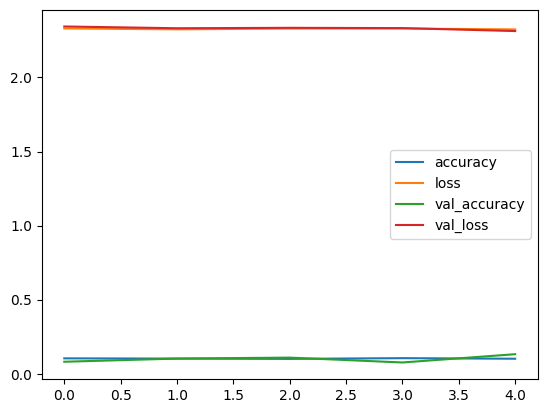

In [ ]:
pd.DataFrame(history_1.history).plot() # very bad model with very very bad accuracy

In [ ]:
model_0.save("model_0.keras")

In [ ]:
model_0.predict(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step


array([[0.09192019, 0.119444  , 0.08032583, ..., 0.12009881, 0.09505254,
        0.07705618],
       [0.09282213, 0.11587232, 0.08242609, ..., 0.12531912, 0.09399255,
        0.07542828],
       [0.09358623, 0.11808134, 0.08346087, ..., 0.12206964, 0.09493001,
        0.07464617],
       ...,
       [0.09466344, 0.119294  , 0.08194382, ..., 0.12243757, 0.09450781,
        0.07416165],
       [0.09396661, 0.11873408, 0.08279641, ..., 0.12332307, 0.0951561 ,
        0.07427065],
       [0.08844427, 0.11676231, 0.0797689 , ..., 0.1225668 , 0.09281065,
        0.08093631]], dtype=float32)

**Performing Data augmentation and creating a better model**

In [ ]:
data_augmentation = tf.keras.models.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
])

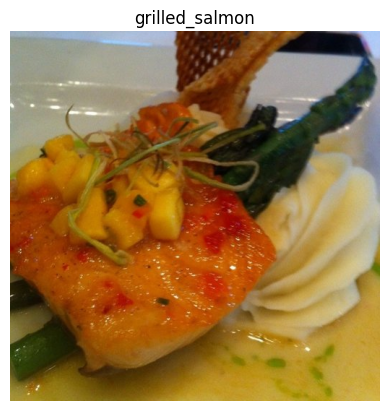

In [ ]:
img = random_image()

(-0.5, 511.5, 575.5, -0.5)

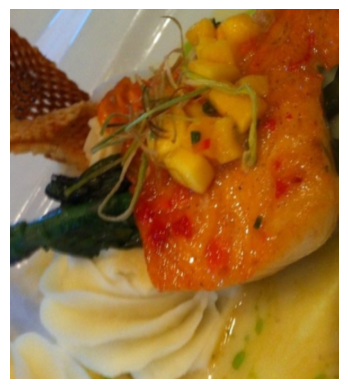

In [ ]:
augmented_img = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis(False)

In [ ]:
from tensorflow.keras.applications import resnet_v2

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
])

base_model = resnet_v2.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
print(inputs.shape)

x = tf.keras.layers.Resizing(224, 224)(inputs)
x = data_augmentation(x)

x = base_model(x, training=False)
x = tf.keras.layers.Dense(100, activation='relu', name="hiddenlayer1")(x)
x = tf.keras.layers.MaxPool2D(name="maxpool_2D")(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten(name="flatten")(x)
x = tf.keras.layers.Dense(50, activation='tanh', name="hiddenlayer2")(x)
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(None, 224, 224, 3)
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 65s 233ms/step - accuracy: 0.5363 - loss: 1.4461 - val_accuracy: 0.7640 - val_loss: 0.7499
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.7316 - loss: 0.8441 - val_accuracy: 0.8020 - val_loss: 0.6210
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 160ms/step - accuracy: 0.7602 - loss: 0.7390 - val_accuracy: 0.8300 - val_loss: 0.5374
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.7744 - loss: 0.6738 - val_accuracy: 0.8252 - val_loss: 0.5572
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 175ms/step - accuracy: 0.7955 - loss: 0.6117 - val_accuracy: 0.8248 - val_loss: 0.5616


In [ ]:
model_1.save("model_1_with_data_augmentation.keras")

In [ ]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.8329 - loss: 0.5413


[0.5616450309753418, 0.8248000144958496]

In [ ]:
for layer_number, layer in enumerate(model_1.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 resizing True
2 sequential_1 True
3 resnet50v2 False
4 hiddenlayer1 True
5 maxpool_2D True
6 global_average_pooling2d True
7 flatten True
8 hiddenlayer2 True
9 output_layer True


In [ ]:
from tensorflow.keras.applications import resnet_v2

data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.3),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.RandomHeight(0.3),
    tf.keras.layers.RandomContrast(0.3),
])

base_model = resnet_v2.ResNet101V2(include_top=False)
base_model.trainable = False

# Unfreeze the top layers for better performance
for layer in base_model.layers[-20:]:
    layer.trainable = True

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = tf.keras.layers.Resizing(224, 224)(inputs)
x = data_augmentation(x)
x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu', name="hiddenlayer1")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(128, activation='relu', name="hiddenlayer2")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Dense(64, activation='relu', name="hiddenlayer3")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.3)(x)

outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001, decay_steps=1000, decay_rate=0.9)

model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)



171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 366ms/step - accuracy: 0.3088 - loss: 2.2363 - val_accuracy: 0.7064 - val_loss: 0.9951
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 305ms/step - accuracy: 0.6056 - loss: 1.2620 - val_accuracy: 0.7244 - val_loss: 0.9691
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 305ms/step - accuracy: 0.6877 - loss: 1.0425 - val_accuracy: 0.8144 - val_loss: 0.6167
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 329ms/step - accuracy: 0.7215 - loss: 0.9021 - val_accuracy: 0.8324 - val_loss: 0.5394
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 77s 307ms/step - accuracy: 0.7537 - loss: 0.8359 - val_accuracy: 0.8296 - val_loss: 0.5652
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 71s 301ms/step - accuracy: 0.7697 - loss: 0.7673 - val_accuracy: 0.8564 - val_loss: 0.4965
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 70s 299ms/step - accuracy: 0.7898 - loss: 0.7139 - val_accuracy: 0.8584 - val_loss: 0.4567
Epoch 8/10
235/235 ━━━━━━━━━

In [ ]:
model_2.save("model_2_with_data_augmentation.keras")

In [ ]:
model_2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.8715 - loss: 0.4305


[0.42555785179138184, 0.8704000115394592]

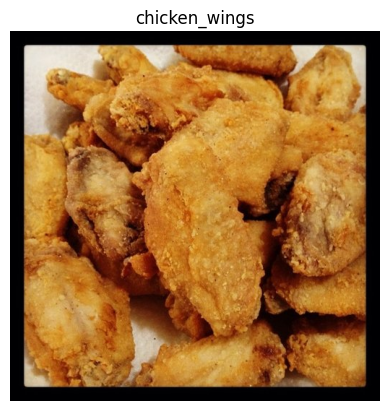

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted class: chicken_wings with probability 1.00


In [ ]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input,decode_predictions


img = random_image()
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

preds = model_2.predict(x)
predicted_class_idx = np.argmax(preds, axis=1)[0]
predicted_class_label = classes[predicted_class_idx]

# Print the result
print(f'Predicted class: {predicted_class_label} with probability {preds[0][predicted_class_idx]:.2f}')


In [ ]:
y_pred = model_2.predict(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step


In [ ]:
y = np.concatenate([y for x, y in test_data], axis=0)

KeyboardInterrupt: 

In [ ]:

# Note: This might take a minute or so due to unravelling 790 batches
y_labels = []

for images, labels in tf.data.Dataset(test_data).unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.argmax())
y_labels[:10] # check what they look like (unshuffled)

TypeError: Can't instantiate abstract class DatasetV2 with abstract methods _inputs, element_spec

In [ ]:
tf.data.Dataset(test_data)

TypeError: Can't instantiate abstract class DatasetV2 with abstract methods _inputs, element_spec